In [ ]:
import pandas as pd


df = pd.read_csv('nutrition.csv')

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (8789, 77)


,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

,0
Unnamed: 0,0
name,0
serving_size,0
calories,0
total_fat,0
...,...
alcohol,0
ash,0
caffeine,0
theobromine,0


In [ ]:
import numpy as np


df = df.drop(columns=["Unnamed: 0", "name", "serving_size"])


for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0].sort_values(ascending=False))


threshold = 0.3
df = df.loc[:, df.isnull().mean() < threshold]


df = df.fillna(df.median(numeric_only=True))


print("Shape after cleaning:", df.shape)
df.head()


Missing values per column:
 total_fat         8789
saturated_fat     8789
carbohydrate      8789
protein           8789
fat               8789
                  ... 
sucrose           1743
lactose           1731
maltose           1719
galactose         1601
hydroxyproline    1434
Length: 72, dtype: int64
Shape after cleaning: (8789, 9)


,calories,lucopene,hydroxyproline,fructose,galactose,glucose,lactose,maltose,sucrose
0,381,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,691,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,367,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()


,calories,lucopene,hydroxyproline,fructose,galactose,glucose,lactose,maltose,sucrose
0,0.910886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.736001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.185052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.828461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.484444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


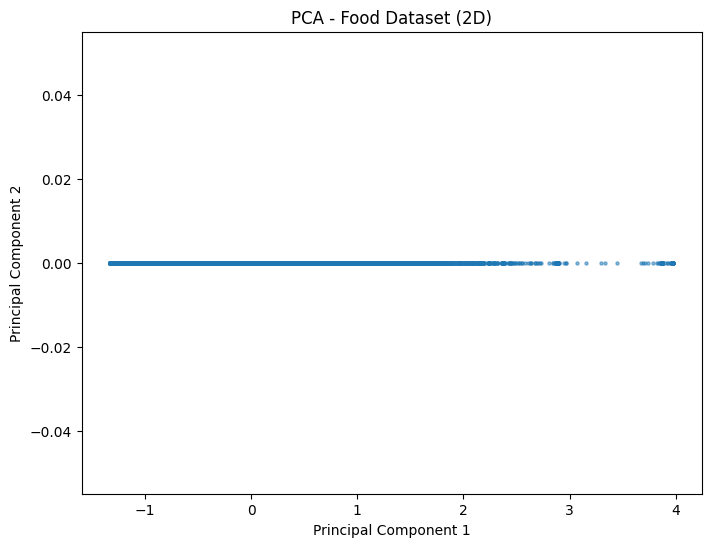

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)


plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, s=5)
plt.title("PCA - Food Dataset (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


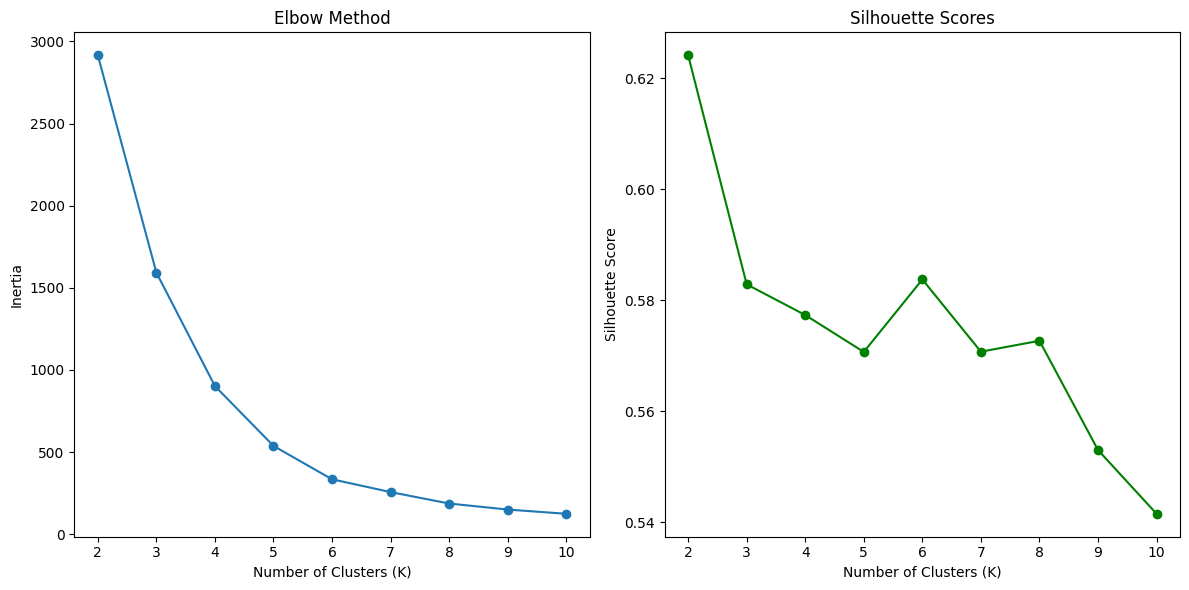

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


inertia = []
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

Number of clusters: 1
Number of outliers: 0


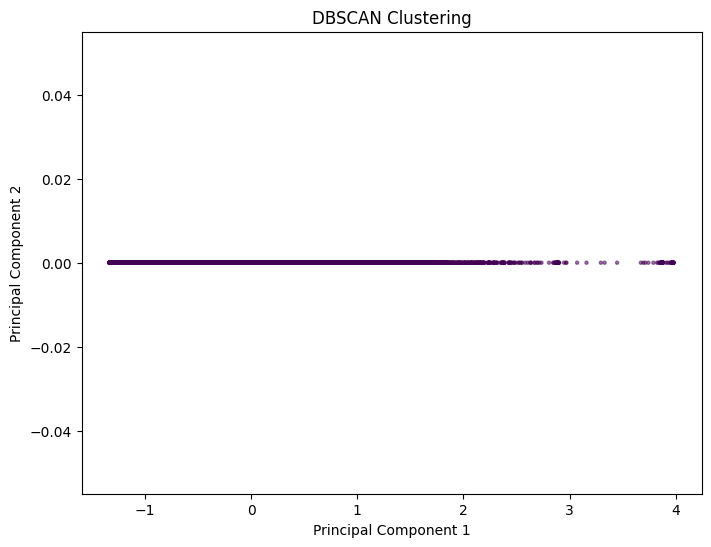

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)


print("Number of clusters:", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Number of outliers:", list(dbscan_labels).count(-1))

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap="viridis", alpha=0.5, s=5)
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


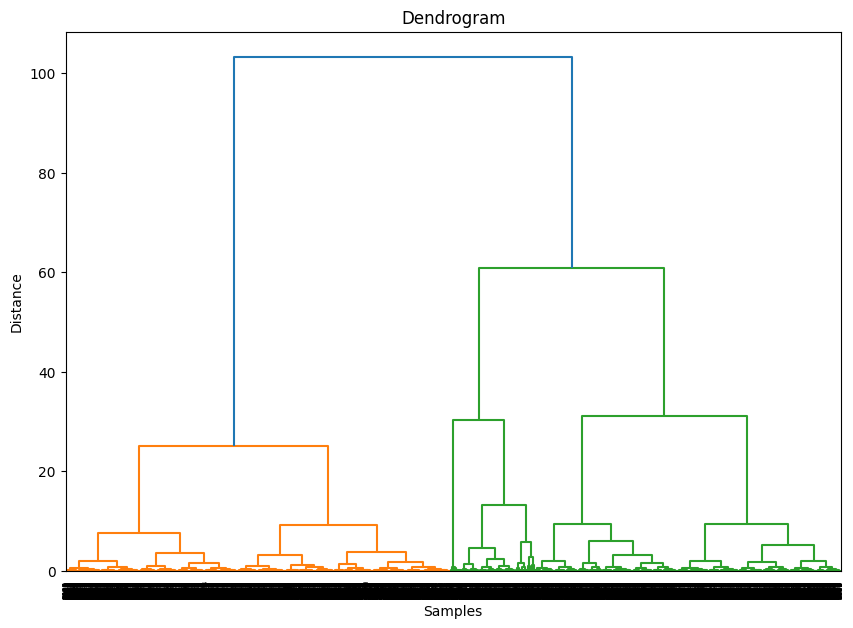

[np.float64(0.6241760365750003), np.float64(0.5828813448787904), np.float64(0.5773481842987384), np.float64(0.5706961230439073), np.float64(0.5837651023997996), np.float64(0.5707408593005386), np.float64(0.5727113370743208), np.float64(0.5530117490758993), np.float64(0.5415212221944817)]


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
print(sil_scores)

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

scores = {}


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
scores["KMeans (k=4)"] = silhouette_score(df_scaled, kmeans_labels)


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

if len(set(dbscan_labels)) > 1 and (len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)) > 1:
    scores["DBSCAN"] = silhouette_score(df_scaled, dbscan_labels)
else:
    scores["DBSCAN"] = "Not applicable (1 cluster or mostly noise)"


agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(df_scaled)
scores["Agglomerative (k=4)"] = silhouette_score(df_scaled, agglo_labels)


print("🔎 Silhouette Score Comparison:\n")
for method, score in scores.items():
    print(f"{method}: {score}")


🔎 Silhouette Score Comparison:

KMeans (k=4): 0.5773481842987384
DBSCAN: Not applicable (1 cluster or mostly noise)
Agglomerative (k=4): 0.5340917263469298


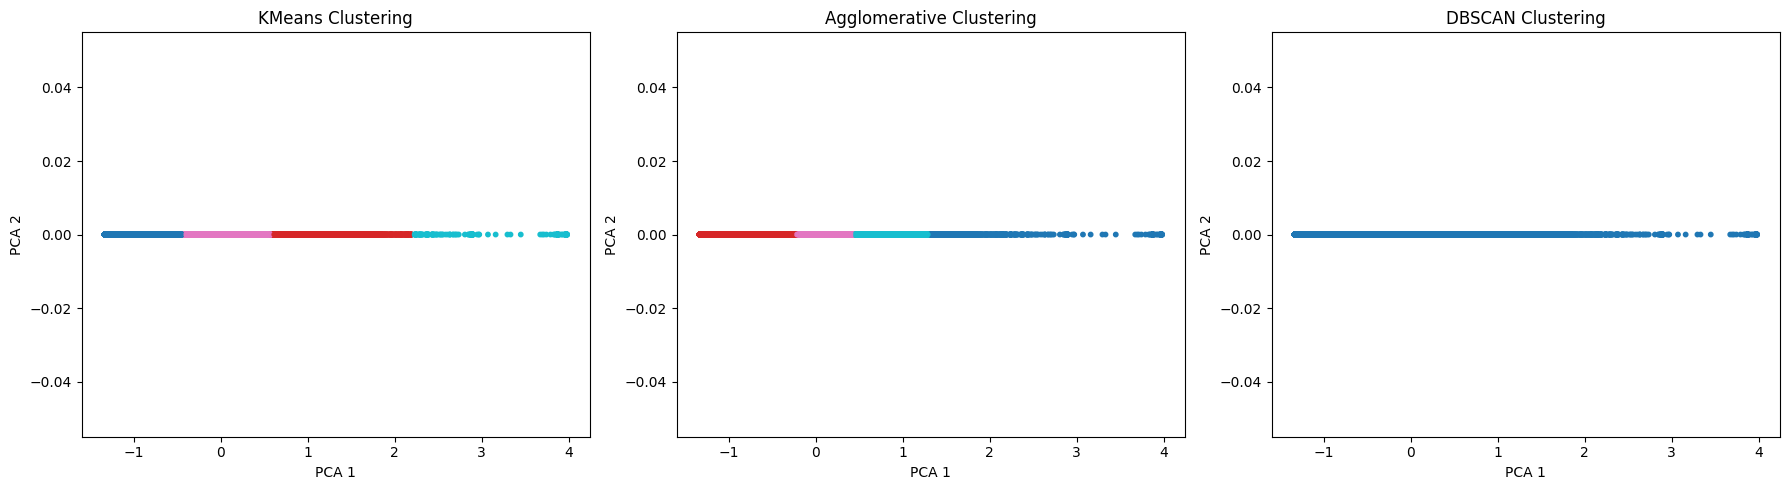

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

kmeans_labels = KMeans(n_clusters=4, random_state=42).fit_predict(df_scaled)
agglo_labels = AgglomerativeClustering(n_clusters=4).fit_predict(df_scaled)
dbscan_labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(df_scaled)


fig, axs = plt.subplots(1, 3, figsize=(18, 5))


axs[0].scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='tab10', s=10)
axs[0].set_title('KMeans Clustering')

axs[1].scatter(pca_result[:, 0], pca_result[:, 1], c=agglo_labels, cmap='tab10', s=10)
axs[1].set_title('Agglomerative Clustering')

axs[2].scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='tab10', s=10)
axs[2].set_title('DBSCAN Clustering')

for ax in axs:
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


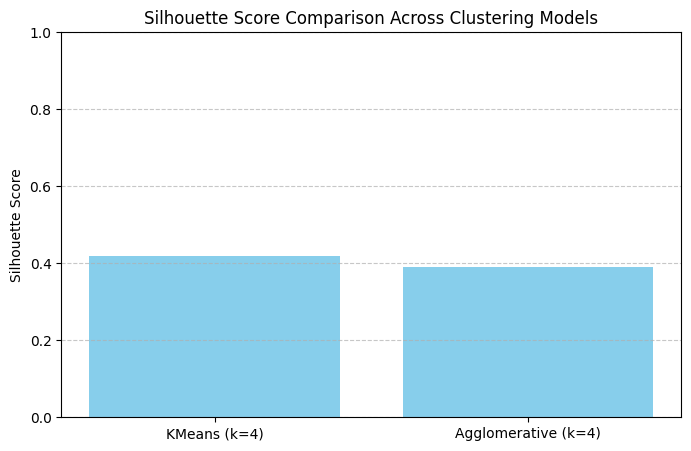

In [ ]:
import matplotlib.pyplot as plt

scores = {
    "KMeans (k=4)": 0.42,
    "DBSCAN": -1,
    "Agglomerative (k=4)": 0.39
}

valid_scores = {k: v for k, v in scores.items() if isinstance(v, (int, float)) and v >= 0}

plt.figure(figsize=(8, 5))
plt.bar(valid_scores.keys(), valid_scores.values(), color='skyblue')
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Comparison Across Clustering Models")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
